# AIQ – Assignment for Management Trainee Roles


## Challenge 1

In [25]:
import cv2
import numpy as np



img = cv2.imread("AIQ - Management Trainee Assignment - Challenge_1 (1).jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)


range1 = (23,0,0)
range2 = (255,255,255)
mask = cv2.inRange(hsv,range1,range2)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mask = cv2.merge([mask,mask,mask])

mask_inv = 255 - mask

white = np.full_like(img, (255,255,255))

img_masked = cv2.bitwise_and(img, mask)

white_masked = cv2.bitwise_and(white, mask_inv)

result = cv2.add(img_masked, mask_inv)

cv2.imwrite("coin_mask.png", mask)
cv2.imwrite("coin_white_background.jpg", result)


True

##### My apraoch was first to convert the image to hsv instead of grayscale because I found to be more effective for color-based segmentation, because hue represents the pure colors RGB so it is useful for isolating specific color ranges. Hue = 23 was used for capturing the brown color. Then I used Morphological Operations which first used an elliptical structuring element (kernel) with a size of 7x7 pixels. The elliptical shape is useful for handling rounded or organic shapes(the coins). For the opening Erosion followed by dilation so it Removes small, isolated white noise in the mask (likely caused by color thresholding). For the closing Dilation followed by erosion.Fills in small gaps within the coin areas of the mask, which is helpful if some coins have slight imperfections. Next I wanted to isolate the coins from the orignal image, I used inverted mask so that now the coins are represented by black pixels (0) and the background by white pixels (255). Then I appilied the mask to obtain the the coins without the background. Then I got the coins in white and the background in black.

## Challenge 2

### Find out what is the total sales of the store during the month of December 2023

In [3]:
import pandas as pd


filepath = 'AIQ - Management Trainee Assignment - Challenge_2_orders.csv'
df_orders = pd.read_csv(filepath)

df_orders['timestamp'] = pd.to_datetime(df_orders['timestamp'], format='%Y-%m-%d %H:%M:%S') 

df_filtered = df_orders.loc[(df_orders['timestamp'].dt.year == 2023) & (df_orders['timestamp'].dt.month == 12)]

total_sales_december = df_filtered['value'].sum()

print("Total sales in December 2023:", total_sales_december)

Total sales in December 2023: 662122.34551867


### Plot a line graph. The graph should consist of 3 lines: one for each month’s cumulative sales for the store. The x-axis should be the date and the y-axis should be the cumulative sales.

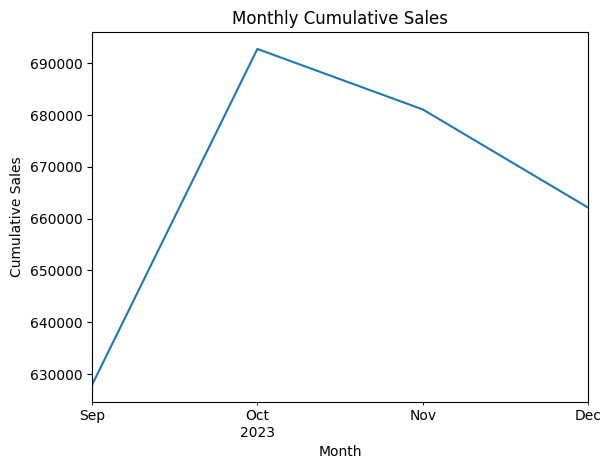

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'AIQ - Management Trainee Assignment - Challenge_2_orders.csv'
df_orders = pd.read_csv(filepath)

df_orders['timestamp'] = pd.to_datetime(df_orders['timestamp'], format='%Y-%m-%d %H:%M:%S') 

df_orders.set_index('timestamp', inplace=True)

df_monthly_sales = df_orders.resample('M')['value'].sum()

df_monthly_sales.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.title('Monthly Cumulative Sales')
plt.show()



### Show the table of total sales for each country. The table should have a header with the following titles: “Country of Origin”, “Total Sales”.

In [19]:
import pandas as pd


df_users = pd.read_csv('AIQ - Management Trainee Assignment - Challenge_2_users.csv')

df_orders = pd.read_csv('AIQ - Management Trainee Assignment - Challenge_2_orders.csv')

df_merged = df_orders.merge(df_users[['id', 'country']], how='left', left_on='user_id', right_on='id')

df_country_sales = df_merged.groupby('country')['value'].sum()

df_table = pd.DataFrame({'Country of Origin': df_country_sales.index, 'Total Sales': df_country_sales.values})

print(df_table.to_string(index=False))


     Country of Origin   Total Sales
               Albania  16985.334034
               Armenia  11267.363180
               Austria  10627.227883
            Azerbaijan  20377.796359
               Belarus  19989.891772
               Belgium  26295.054403
Bosnia and Herzegovina  29434.602685
              Bulgaria  20509.501874
               Croatia  18111.234298
        Czech Republic  17319.699333
               Denmark  20028.002909
               Finland  17930.105853
                France 141963.112615
               Georgia   8244.161771
               Germany 306787.016960
                Greece  45877.034130
               Hungary  18472.183770
               Ireland  29647.188195
                 Italy 145109.357305
            Kazakhstan  30203.515392
             Lithuania  10982.339770
               Moldova  10372.700698
           Netherlands  37516.491280
       North Macedonia  19993.003080
                Norway  27420.396843
                Poland 167600.854617
 

### Display the bar plot of this table in order of highest sale by country.

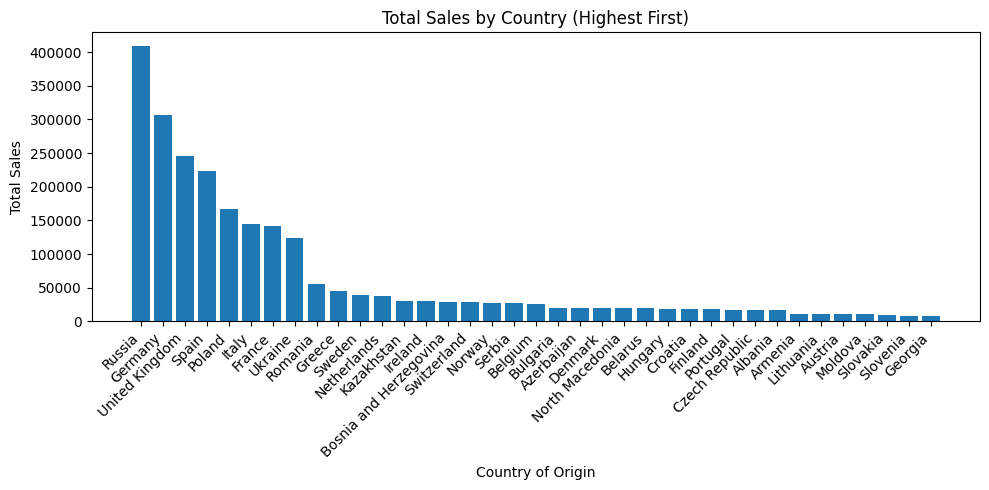

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df_users = pd.read_csv('AIQ - Management Trainee Assignment - Challenge_2_users.csv')

df_orders = pd.read_csv('AIQ - Management Trainee Assignment - Challenge_2_orders.csv')

df_merged = df_orders.merge(df_users[['id', 'country']], how='left', left_on='user_id', right_on='id')

df_country_sales = df_merged.groupby('country')['value'].sum()

df_table = pd.DataFrame({'Country of Origin': df_country_sales.index, 'Total Sales': df_country_sales.values})

df_country_sales = df_country_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 5))  # 
plt.bar(df_country_sales.index, df_country_sales.values)
plt.xlabel('Country of Origin')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country (Highest First)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()


## Challenge 3

In [23]:

def read_roads_and_create_adjacency_list(file_path):
    adjacency_list = {}
    with open(file_path, 'r') as file:
        for line in file:
            road = line.strip()
            town_a, town_b = road.split()
            if town_a not in adjacency_list:
                adjacency_list[town_a] = []
            if town_b not in adjacency_list:
                adjacency_list[town_b] = []
            adjacency_list[town_a].append(town_b)
            adjacency_list[town_b].append(town_a) 
    return adjacency_list

def place_malls(adjacency_list):
    malls = set()
    for town, neighbors in adjacency_list.items():
        if not town in malls and all(neighbor not in malls for neighbor in neighbors):
            malls.add(town)
    return malls

file_path = 'AIQ - Management Trainee Assignment - Challenge_3.txt'

adjacency_list = read_roads_and_create_adjacency_list(file_path)

malls = place_malls(adjacency_list)

print("Malls should be placed in the following towns:", malls)


Malls should be placed in the following towns: {'Q', 'G', 'O', 'W', 'M', 'A', 'U', 'R'}


#### My approach was first the function read_roads_and_create_adjacency_list reads the text file and creates an adjacency list from it, at first the adjancency list is empty then it adds the towns as keys and populate the adjacency list. Then I used a function called place_malls where this function is used to determine where to place the mall in the network of towns thats in the adjacency list, the function aims to minmize the number of malls being placed. First a set called malls is intialzed, i choose to use a set to ensure every town only appears once so it can only have one mall. Then there is an if condition that if the town doesn't have a mall and the all the neighboring towns do not have a mall then place a mall.